## 단순 선형 회귀(Linear Regression)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### 아버지와 아들의 키 - Galton

In [26]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [28]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


### 아버지와 아들의 키만 발췌

In [30]:
df = df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [31]:
height = df[['Father','Height']].rename(columns={'Height':'Son'})
height['Father'] = height.Father * 2.54
height.Son = height.Son * 2.54
height.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


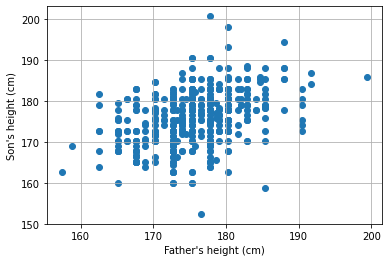

In [32]:
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Numpy 최소자승법(Leatst Squere)

In [33]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T 
A.shape

(465, 2)

In [34]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [35]:
# 기울기와 절편
m, c = reg[0]

In [36]:
# 잔차 제곱의 합 (REsidual Sum of Square)
rss = reg[1][0]

In [37]:
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.4f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.5995


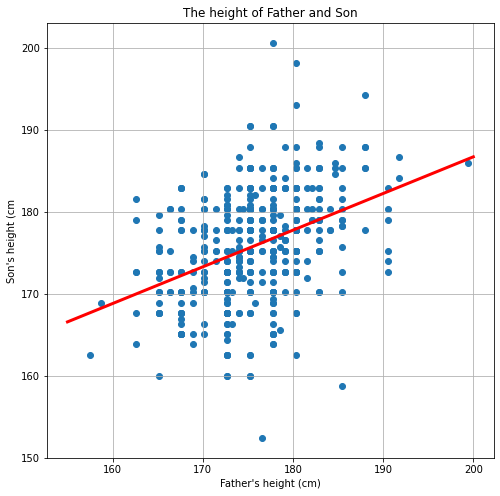

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155,200], [m*155+c,m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm")
plt.grid()
plt.show()

### Scikit-Learn의 선형회귀

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
type(height.Father), type(height.Father.values), height.Father.values.shape

(pandas.core.series.Series, numpy.ndarray, (465,))

In [43]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [44]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [45]:
weight, bias = lr.coef_, lr.intercept_
residue = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {residue:.4f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.5995


In [46]:
# Scikit-Learn 결과 = 넘파이 최소자승법 결과
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.4f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.5995


In [47]:
# 평가지표로 R_squared score
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


### 당뇨병 데이터셋

In [48]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 당뇨병 vs BMI

In [49]:
X = df.bmi.values.reshape(-1,1)
y = diabetes.target

In [50]:
X.shape

(442, 1)

In [51]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [52]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {residue:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차제곱: 17556.60


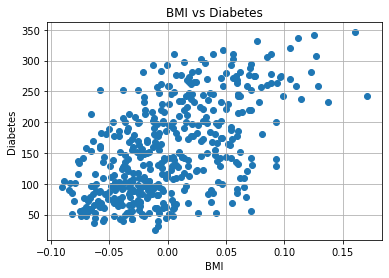

In [53]:
plt.scatter(X, y)
plt.title('BMI vs Diabetes')
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

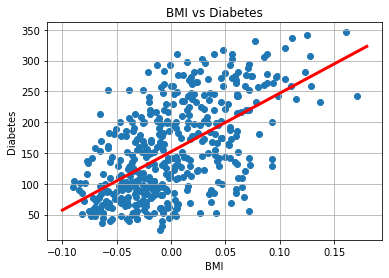

In [54]:
plt.scatter(X, y)
plt.plot([-0.1,0.18], [weight[0]*(-0.1)+bias, weight[0]*0.18+bias], 'r', lw=3)
plt.title('BMI vs Diabetes')
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

In [55]:
lr.score(X, y)

0.3439237602253803

In [56]:
from sklearn.metrics import r2_score
pred = lr.predict(X)
r2_score(y, pred)

0.3439237602253803

### 표본 데이터를 만들어 R_squared 값이 어떻게 변하는지 확인

In [59]:
from sklearn.datasets import make_regression

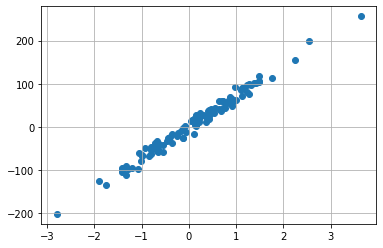

In [60]:
X1, y1 = make_regression(n_samples=100, n_features=1, n_targets=1,
                         noise=10, random_state=2021)
plt.scatter(X1, y1)
plt.grid()
plt.show()

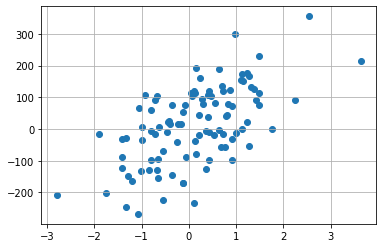

In [61]:
X2, y2 = make_regression(n_samples=100, n_features=1, n_targets=1,
                         noise=100, random_state=2021)
plt.scatter(X2, y2)
plt.grid()
plt.show()

In [62]:
lr1 = LinearRegression()
lr1.fit(X1, y1)
lr1.score(X1, y1)

0.9827855106643268

In [63]:
lr2 = LinearRegression()
lr2.fit(X2, y2)
lr2.score(X2, y2)

0.3644244725778779

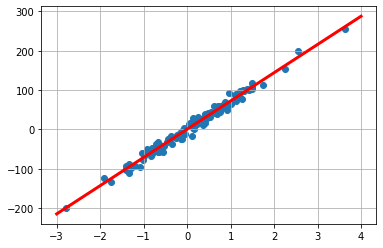

In [64]:
plt.scatter(X1, y1)
plt.plot([-3,4], [lr1.coef_[0]*(-3)+lr1.intercept_, lr1.coef_[0]*4+lr1.intercept_], 'r', lw=3)
plt.grid()
plt.show()

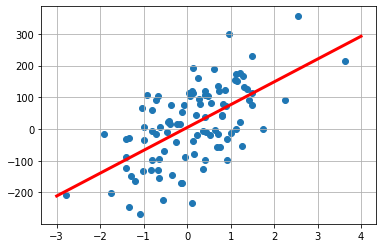

In [65]:
plt.scatter(X2, y2)
plt.plot([-3,4], [lr2.coef_[0]*(-3)+lr2.intercept_, lr2.coef_[0]*4+lr2.intercept_], 'r', lw=3)
plt.grid()
plt.show()

In [66]:
print(f'첫번째 그림 - 기울기: {lr1.coef_[0]:.4f}, 절편: {lr1.intercept_:.4f}, 잔차제곱: {lr1._residues:.2f}')
print(f'두번째 그림 - 기울기: {lr2.coef_[0]:.4f}, 절편: {lr2.intercept_:.4f}, 잔차제곱: {lr2._residues:.2f}')

첫번째 그림 - 기울기: 71.7820, 절편: 0.4538, 잔차제곱: 9331.95
두번째 그림 - 기울기: 71.9372, 절편: 4.5383, 잔차제곱: 933195.17
